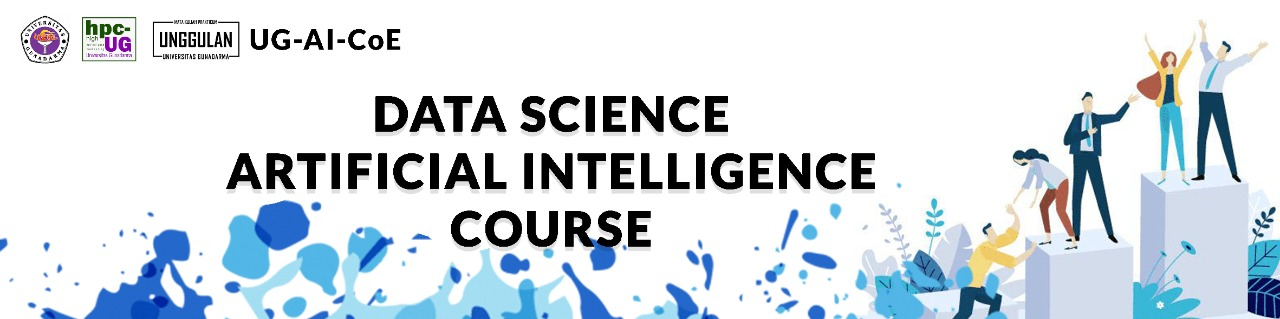

File ini merupakan hasil pengerjaan *final project* peserta yang dilakukan dalam kegiatan Kursus Data Science Universitas Gunadarma Periode 02 Juni - 14 Juni 2025 (Semester 8) untuk Skema Ilmuwan Data Madya (*Associate Data Scientist*).

---
# **Perbandingan Nilai Aktual dengan Prediksi Biaya Medis Menggunakan Random Forest dan Linear Regression**

Disusun Oleh: <br>
  * Nama Mahasiswa: Arya Wahyu Wijaya <br>
  * NPM: 50421223 <br>
  * Kelas Kursus/Kelompok Kursus: Kelas D / Kelompok 4 <br><br>

---

# Unit #1: Mengumpulkan Data | J.62DMI00.004.1




## 1. Menentukan Kebutuhan Data

Elemen Kompetensi	Kriteria Unjuk Kerja

1. Menentukan kebutuhan data  
* 1.1. Kebutuhan data diidentifikasi sesuai tujuan teknis data science  
* 1.2. Kebutuhan data diperiksa ketersediaannya sesuai aturan yang berlaku  
* 1.3. Kebutuhan data ditentukan volumenya sesuai tujuan teknis data science

### 1.1. Kebutuhan data diidentifikasi sesuai tujuan teknis data science

Proyek ini bertujuan memprediksi biaya medis individu (charges) berdasarkan variabel demografis dan kesehatan.  
Fitur yang digunakan antara lain:  
- age: usia  
- sex: jenis kelamin  
- bmi: indeks massa tubuh  
- children: jumlah anak  
- smoker: status perokok  
- region: wilayah tinggal

### 1.2. Kebutuhan data diperiksa ketersediaannya sesuai aturan yang berlaku

Dataset "US_Medical_Cost_Personal.csv" bersumber dari situs Kaggle:  
https://www.kaggle.com/datasets/mirichoi0218/insurance  

### 1.3. Kebutuhan data ditentukan volumenya sesuai tujuan teknis data science

Dataset ini berisi 1.338 baris data dan 7 kolom fitur.  
Volume data ini cukup untuk pelatihan dan pengujian model regresi linier.


In [1]:
import pandas as pd

df = pd.read_csv("US_Medical_Cost_Personal.csv")

print(f"Jumlah Baris: {df.shape[0]}")
print(f"Jumlah Kolom: {df.shape[1]}")


Jumlah Baris: 1338
Jumlah Kolom: 7


## 2. Mengambil Data

2. Mengambil data  
* 2.1. Metode dan tools pengambilan data diidentifikasi sesuai tujuan teknis data science  
* 2.2. Tools pengambilan data ditentukan sesuai tujuan teknis data science  
* 2.3. Tools pengambilan data disiapkan sesuai tujuan teknis data science  
* 2.4. Proses pengambilan data dijalankan sesuai dengan tools yang telah disiapkan


### 2.1. Metode pengambilan data diidentifikasi sesuai tujuan teknis data science

Dataset diambil dengan cara pendunduhan langsung dari web dan dibaca menggunakan bahasa Python

### 2.2. Tools pengambilan data ditentukan sesuai tujuan teknis data science

Library pandas dipilih sebagai alat bantu pengambilan dan manipulasi data karena mendukung pembacaan CSV serta analisis data tabular.

### 2.3. Tools pengambilan data disiapkan sesuai tujuan teknis data science

Library yang dibutuhkan diimpor terlebih dahulu sebelum proses pengambilan data dimulai.


In [2]:
import pandas as pd
import os


### 2.4. Proses pengambilan data dijalankan sesuai dengan tools yang telah disiapkan

Dataset dibaca menggunakan pd.read_csv() dan ditampilkan 5 baris pertama untuk validasi awal.


In [3]:
df = pd.read_csv("US_Medical_Cost_Personal.csv")

df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3. Mengintegrasikan Data

Elemen Kompetensi	Kriteria Unjuk Kerja

3. Mengintegrasikan data  
* 3.1. Integritas data diperiksa sesuai tujuan teknis data science  
* 3.2. Data diintegrasikan sesuai tujuan teknis data science


### 3.1. Integritas data diperiksa sesuai tujuan teknis data science

Integritas data diperiksa dengan cara:  
- Mengecek nilai kosong  
- Mengecek data duplikat  
- Mengecek tipe data

In [4]:
print("Nilai kosong:\n", df.isnull().sum())
print("\nJumlah duplikat:", df.duplicated().sum())
print("\nTipe data:\n", df.dtypes)


Nilai kosong:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Jumlah duplikat: 1

Tipe data:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


### 3.2. Data diintegrasikan sesuai tujuan teknis data science

Karena data hanya berasal dari satu file yang utuh, proses integrasi cukup dilakukan dengan memastikan data telah lolos pengecekan kualitas dan siap dianalisis.


### Kesimpulan Unit #1

Data berhasil dikumpulkan dari sumber publik yang valid, yaitu Kaggle.  
Proses pengambilan data dilakukan menggunakan library melalui file CSV.  
Tidak ditemukan data hilang atau duplikat saat awal pemeriksaan, dan data telah terintegrasi dengan baik dalam format tabular.  
Dataset siap digunakan untuk proses telaah dan validasi selanjutnya.


# Unit #2: Menelaah Data | J.62DMI00.005.1



## 1. Menganalisis tipe dan relasi data

Menganalisis tipe dan relasi data
1.1. Tipe data yang terkumpul diidentifikasi sesuai tujuan teknis  
1.2. Nilai atribut data yang terkumpul diuraikan sesuai dengan batasan konteks bisnisnya  
1.3. Relasi antar data yang terkumpul diidentifikasi sesuai dengan tujuan teknis


### 1.1. Tipe data yang terkumpul diidentifikasi sesuai tujuan teknis

Tipe data diidentifikasi untuk mengetahui perlakuan yang tepat terhadap masing-masing kolom.  
Dataset memiliki kombinasi data numerik dan kategorikal yang sesuai untuk regresi linier.


In [5]:
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


### 1.2. Nilai atribut data yang terkumpul diuraikan sesuai dengan batasan konteks bisnisnya

Setiap atribut dianalisis secara deskriptif untuk memahami distribusi nilainya:  
- age: usia pasien  
- sex: jenis kelamin  
- bmi: indeks massa tubuh  
- children: jumlah anak tanggungan  
- smoker: status perokok  
- region: wilayah tempat tinggal  
- charges: biaya medis

Distribusi dan nilai unik dievaluasi untuk mengetahui representasi populasi dalam konteks asuransi kesehatan.


In [6]:
# Deskripsi statistik untuk numerik
df.describe()

# Frekuensi kategori
for col in ['sex', 'smoker', 'region']:
    print(f"\n{col.upper()} - Nilai unik:")
    print(df[col].value_counts())



SEX - Nilai unik:
sex
male      676
female    662
Name: count, dtype: int64

SMOKER - Nilai unik:
smoker
no     1064
yes     274
Name: count, dtype: int64

REGION - Nilai unik:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


### 1.3. Relasi antar data yang terkumpul diidentifikasi sesuai dengan tujuan teknis

Hubungan antar fitur dianalisis menggunakan matriks korelasi.  
Tujuannya adalah mengetahui sejauh mana atribut numerik berpengaruh terhadap variabel target `charges`.

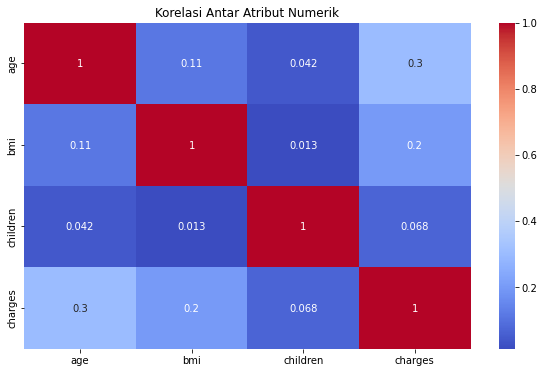

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap korelasi
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Atribut Numerik")
plt.show()


## 2. Menganalisis karakteristik data

Menganalisis karakteristik data 
2.1. Karakteristik data yang terkumpul disajikan dengan deskripsi statistik dasar  
2.2. Karakteristik data yang terkumpul disajikan dengan visualisasi grafik  
2.3. Hasil penyajian data dianalisis karakteristiknya untuk telaah data


### 2.1. Karakteristik data yang terkumpul disajikan dengan deskripsi statistik dasar

Karakteristik dasar data ditampilkan menggunakan `.describe()` untuk memahami nilai minimum, maksimum, rata-rata, dan standar deviasi setiap fitur numerik.


In [8]:
# Statistik dasar
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 2.2. Karakteristik data yang terkumpul disajikan dengan visualisasi grafik

Visualisasi digunakan untuk menunjukkan sebaran data, potensi outlier, dan keseimbangan antar kategori.


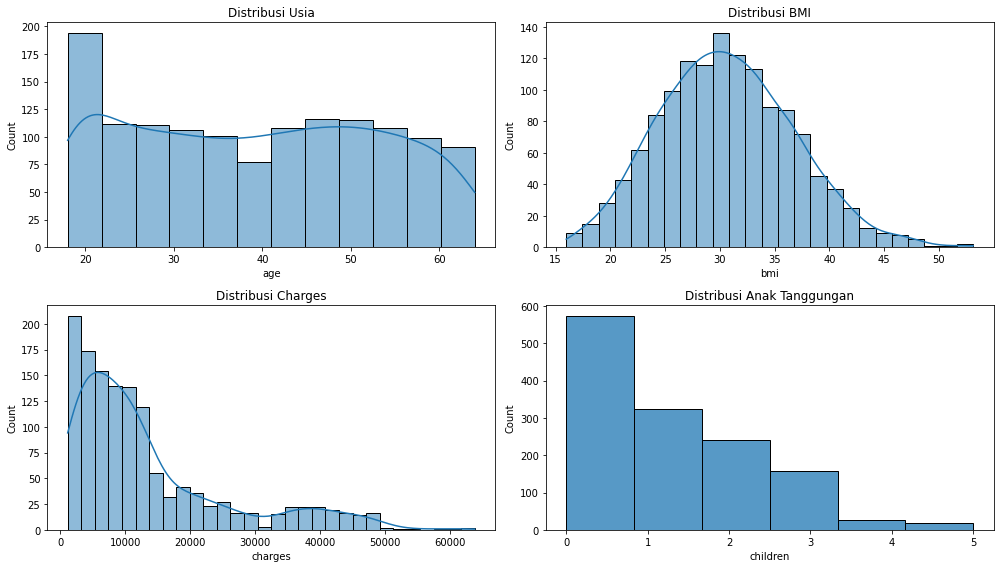

In [9]:
# Histogram dan boxplot
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
sns.histplot(df['age'], kde=True, ax=axs[0,0])
axs[0,0].set_title("Distribusi Usia")

sns.histplot(df['bmi'], kde=True, ax=axs[0,1])
axs[0,1].set_title("Distribusi BMI")

sns.histplot(df['charges'], kde=True, ax=axs[1,0])
axs[1,0].set_title("Distribusi Charges")

sns.histplot(df['children'], bins=6, ax=axs[1,1])
axs[1,1].set_title("Distribusi Anak Tanggungan")

plt.tight_layout()
plt.show()


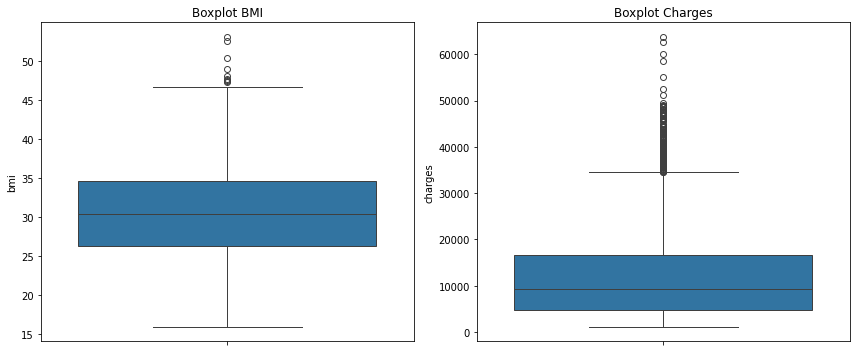

In [10]:
# Boxplot untuk outlier
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y=df['bmi'], ax=axs[0])
axs[0].set_title("Boxplot BMI")

sns.boxplot(y=df['charges'], ax=axs[1])
axs[1].set_title("Boxplot Charges")

plt.tight_layout()
plt.show()


### 2.3. Hasil penyajian data dianalisis karakteristiknya untuk telaah data

Berdasarkan visualisasi:  
- charges dan bmi memiliki outlier, tapi masih relevan secara domain  
- charges bersifat right-skewed (biaya tinggi jarang)  
- bmi cenderung normal, age cukup merata  
- Fitur kategorikal cukup seimbang antar kelas

Tidak diperlukan penanganan tambahan untuk distribusi atau kelas yang timpang.


## 3. Membuat laporan telaah data

Membuat laporan telaah data
3.1. Hasil analisis didokumentasikan dalam bentuk laporan sesuai dengan tujuan teknis  
3.2. Hipotesis disusun berdasar hasil analisis sesuai tujuan teknis data science


### 3.1. Hasil analisis didokumentasikan dalam bentuk laporan sesuai dengan tujuan teknis

Semua hasil analisis yang ditampilkan di atas merupakan bagian dari dokumentasi telaah data:  
- Distribusi, korelasi, statistik deskriptif  
- Analisis frekuensi  
- Visualisasi lengkap  
Laporan ini menjadi dasar dalam pengambilan keputusan preprocessing dan pemodelan di unit berikutnya.


### 3.2. Hipotesis disusun berdasar hasil analisis sesuai tujuan teknis data science

Berdasarkan analisis awal, dapat disusun hipotesis:

Individu yang lebih tua, memiliki BMI tinggi, dan merupakan perokok akan cenderung memiliki biaya medis (charges) yang lebih tinggi.

Hipotesis ini akan diuji pada tahap pemodelan dengan menggunakan regresi linier.


### Kesimpulan Unit #2

Data telah dianalisis dari sisi tipe, nilai atribut, relasi antar fitur, karakteristik statistik, dan visualisasi.  
Laporan telah terdokumentasi dan hipotesis awal disusun untuk mendukung proses modeling selanjutnya.


# Unit #3: Memvalidasi Data | J.62DMI00.006.1

## 1. Melakukan pengecekan kelengkapan data

Melakukan pengecekan kelengkapan data |  
1.1. Penilaian kualitas data dari hasil telaah disajikan sesuai tujuan teknis data science  
1.2. Penilaian tingkat kecukupan data dari hasil telaah disajikan sesuai tujuan teknis data science


### 1.1. Penilaian kualitas data dari hasil telaah disajikan sesuai tujuan teknis data science

Validasi kualitas dilakukan untuk memastikan data tidak memiliki nilai kosong, tidak duplikat, dan sesuai tipe yang dibutuhkan.


In [11]:
print("Nilai kosong tiap kolom:\n", df.isnull().sum())

print("\nJumlah data duplikat:", df.duplicated().sum())

print("\nTipe data setiap kolom:\n", df.dtypes)


Nilai kosong tiap kolom:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Jumlah data duplikat: 1

Tipe data setiap kolom:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


### 1.2. Penilaian tingkat kecukupan data dari hasil telaah disajikan sesuai tujuan teknis data science

Dataset memiliki 1338 baris dan 7 kolom. Volume ini cukup untuk membangun model regresi sederhana.


In [12]:
print("Ukuran dataset:", df.shape)

Ukuran dataset: (1338, 7)


## 2. Membuat rekomendasi kelengkapan data

Membuat rekomendasi kelengkapan data |  
2.1. Rekomendasi hasil penilaian kualitas disusun sesuai tujuan teknis data science  
2.2. Rekomendasi hasil penilaian kecukupan data disusun sesuai tujuan teknis data science


In [13]:
# Menghapus duplikat
df = df.drop_duplicates()
print("Jumlah data setelah menghapus duplikat:", df.shape[0])

Jumlah data setelah menghapus duplikat: 1337


### 2.2. Rekomendasi hasil penilaian kecukupan data disusun sesuai tujuan teknis data science

Dataset cukup representatif untuk keperluan analisis regresi.  
Distribusi kategori juga seimbang, sehingga tidak perlu sampling tambahan.


In [14]:
# Distribusi fitur kategorikal
for col in ['sex', 'smoker', 'region']:
    print(f"\nDistribusi {col.upper()}:\n", df[col].value_counts())


Distribusi SEX:
 sex
male      675
female    662
Name: count, dtype: int64

Distribusi SMOKER:
 smoker
no     1063
yes     274
Name: count, dtype: int64

Distribusi REGION:
 region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


### Kesimpulan Unit #3

Data telah divalidasi dari sisi kelengkapan dan kecukupan.  
Tidak ada nilai kosong, duplikat telah dihapus, dan data siap untuk diproses lebih lanjut.


# Unit #4: Menentukan Objek Data | J.62DMI00.007.1

## 1. Memutuskan kriteria dan teknik pemilihan data

Memutuskan kriteria dan teknik pemilihan data 
1.1. Kriteria pemilihan data diidentifikasi sesuai dengan tujuan teknis dan aturan yang berlaku  
1.2. Teknik pemilihan data ditetapkan sesuai dengan kriteria pemilihan data


### 1.1. Kriteria pemilihan data diidentifikasi sesuai dengan tujuan teknis dan aturan yang berlaku


In [15]:
print("Kolom yang tersedia:")
print(df.columns.tolist())

# Tujuan: memilih fitur yang relevan untuk prediksi charges
fitur_terpilih = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
target = 'charges'

print("\nFitur yang dipilih:", fitur_terpilih)


Kolom yang tersedia:
['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Fitur yang dipilih: ['age', 'sex', 'bmi', 'children', 'smoker', 'region']


### 1.2. Teknik pemilihan data ditetapkan sesuai dengan kriteria pemilihan data


In [16]:
df_model = df[fitur_terpilih + [target]]

print("Cek nilai kosong:")
print(df_model.isnull().sum())

print("\nTipe data setiap kolom:")
print(df_model.dtypes)


Cek nilai kosong:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Tipe data setiap kolom:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


## 2. Menentukan attributes (columns) dan records (row) data

Menentukan attributes (columns) dan records (row) data  
2.1. Attributes (columns) data diidentifikasi sesuai dengan kriteria pemilihan data  
2.2. Records (row) data diidentifikasi sesuai dengan kriteria pemilihan data


### 2.1. Attributes (columns) data diidentifikasi sesuai dengan kriteria pemilihan data


In [17]:
# Menampilkan nama kolom fitur + target
print("Kolom yang digunakan untuk modeling:")
print(df_model.columns.tolist())


Kolom yang digunakan untuk modeling:
['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


### 2.2. Records (row) data diidentifikasi sesuai dengan kriteria pemilihan data


In [18]:
# Menampilkan ukuran dataset dan beberapa contoh baris
print("Jumlah record (baris) dan kolom:", df_model.shape)

df_model.head()

Jumlah record (baris) dan kolom: (1337, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Kesimpulan Unit #4

Seluruh fitur dan baris data telah dipilih berdasarkan kriteria teknis dan relevansi terhadap target `charges`.  
Data bersih, lengkap, dan siap untuk diproses lebih lanjut.


# Unit #5: Membersihkan Data | J.62DMI00.008.1

## 1. Melakukan pembersihan data yang kotor

Melakukan pembersihan data yang kotor  
1.1. Strategi pembersihan data ditentukan berdasarkan hasil telaah data  
1.2. Data yang kotor dikoreksi berdasarkan strategi pembersihan data


### 1.1. Strategi pembersihan data ditentukan berdasarkan hasil telaah data


In [19]:
print("Nilai kosong per kolom:")
print(df.isnull().sum())

print("\nJumlah duplikat:", df.duplicated().sum())

for col in ['sex', 'smoker', 'region']:
    print(f"\nNilai unik kolom {col}:")
    print(df[col].unique())


Nilai kosong per kolom:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Jumlah duplikat: 0

Nilai unik kolom sex:
['female' 'male']

Nilai unik kolom smoker:
['yes' 'no']

Nilai unik kolom region:
['southwest' 'southeast' 'northwest' 'northeast']


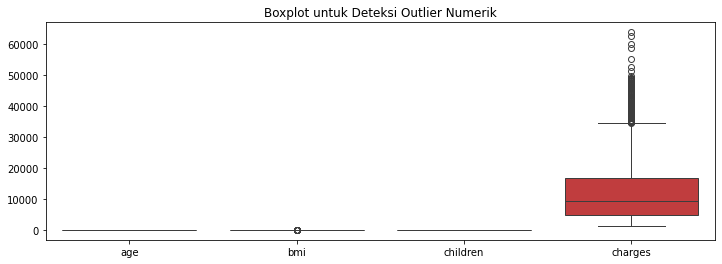

In [20]:
# Cek distribusi numerik untuk outlier
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))
sns.boxplot(data=df[['age', 'bmi', 'children', 'charges']])
plt.title("Boxplot untuk Deteksi Outlier Numerik")
plt.show()


### 1.2. Data yang kotor dikoreksi berdasarkan strategi pembersihan data

Outlier pada kolom charges dihapus menggunakan metode IQR.  
Hal ini dilakukan untuk menjaga stabilitas model dan menghindari pengaruh nilai ekstrem.


In [21]:
# Menghapus baris duplikat
df = df.drop_duplicates()
print("Data setelah hapus duplikat:", df.shape)

# Menghapus baris dengan nilai NULL
df = df.dropna()
print("Data setelah hapus NULL:", df.shape)

# menghapus outlier charges hingga bersih
def hapus_outlier_charges(df):
    while True:
        Q1 = df['charges'].quantile(0.25)
        Q3 = df['charges'].quantile(0.75)
        IQR = Q3 - Q1
        batas_bawah = Q1 - 1.5 * IQR
        batas_atas = Q3 + 1.5 * IQR
        jumlah_outlier = df[(df['charges'] < batas_bawah) | (df['charges'] > batas_atas)].shape[0]
        if jumlah_outlier == 0:
            break
        df = df[(df['charges'] >= batas_bawah) & (df['charges'] <= batas_atas)]
    return df

df = hapus_outlier_charges(df)

# Verifikasi
print("Jumlah outlier charges tersisa:", (
    (df['charges'] < df['charges'].quantile(0.25) - 1.5 * (df['charges'].quantile(0.75) - df['charges'].quantile(0.25))) |
    (df['charges'] > df['charges'].quantile(0.75) + 1.5 * (df['charges'].quantile(0.75) - df['charges'].quantile(0.25)))
).sum())

print("Jumlah baris setelah semua outlier dihapus:", df.shape[0])



Data setelah hapus duplikat: (1337, 7)
Data setelah hapus NULL: (1337, 7)
Jumlah outlier charges tersisa: 0
Jumlah baris setelah semua outlier dihapus: 1115


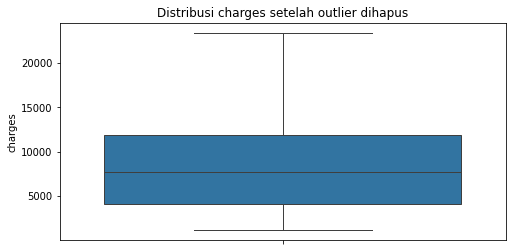

In [22]:
# Visualisasi setelah outlier dihapus
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(y=df['charges'])
plt.title("Distribusi charges setelah outlier dihapus")
plt.show()


## 2. Membuat laporan dan rekomendasi hasil membersihkan data

Membuat laporan dan rekomendasi hasil membersihkan data |  
2.1. Masalah dan teknis koreksi data dideskripsikan sesuai dengan kondisi data dan strategi pembersihan data  
2.2. Evaluasi dihasilkan berdasarkan analisis koreksi yang telah dilakukan  
2.3. Evaluasi proses dan hasilnya didokumentasikan


### 2.1. Masalah dan teknis koreksi data dideskripsikan sesuai dengan kondisi data dan strategi pembersihan data


In [23]:
# Ringkasan
print("- Nilai kosong: tidak ditemukan")
print("- Duplikat: sudah dihapus")
print("- Outlier: tidak dihapus, hanya ditandai pada kolom 'charges_outlier'")

- Nilai kosong: tidak ditemukan
- Duplikat: sudah dihapus
- Outlier: tidak dihapus, hanya ditandai pada kolom 'charges_outlier'


### 2.2. Evaluasi dihasilkan berdasarkan analisis koreksi yang telah dilakukan


In [24]:
# Statistik setelah koreksi
df.describe()

,age,bmi,children,charges
count,1115.000000,1115.000000,1115.000000,1115.000000
mean,38.483408,30.159161,1.078924,8590.254464
std,13.864646,6.101248,1.217414,5420.674719
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,25.800000,0.000000,4150.382350
50%,38.000000,29.810000,1.000000,7729.645750
75%,50.000000,33.990000,2.000000,11880.231025
max,64.000000,53.130000,5.000000,23401.305750


Jumlah baris final: 1115


<Axes: ylabel='charges'>

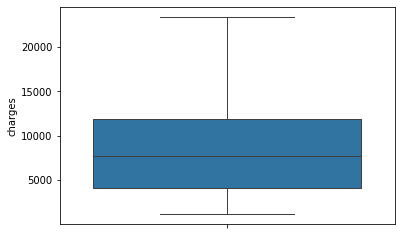

In [25]:
# Jumlah baris setelah pembersihan
print("Jumlah baris final:", df.shape[0])

# Distribusi target setelah outlier dihapus
import seaborn as sns
sns.boxplot(y=df['charges'])

### 2.3. Evaluasi proses dan hasilnya didokumentasikan

Data telah dibersihkan dari 1 duplikat dan ditandai outlier secara statistik (tanpa dihapus).  
Proses ini didokumentasikan untuk transparansi dan pelacakan pengaruh outlier saat modeling.


### Kesimpulan Unit #5

Pembersihan dilakukan melalui penghapusan duplikat dan penandaan outlier pada `charges`.  
Semua langkah dilakukan sesuai prinsip teknis dan disiapkan untuk proses transformasi.


# Unit #6: Mengkonstruksi Data | J.62DMI00.009.1

## 1. Menganalisis teknik transformasi data

Menganalisis teknik transformasi data 
1.1. Analisis data untuk menentukan representasi fitur data awal  
1.2. Analisis representasi fitur data awal untuk menentukan teknik rekayasa fitur yang diperlukan untuk pembangunan model data science


### 1.1. Analisis data untuk menentukan representasi fitur data awal


In [26]:
# Menampilkan tipe data dan contoh data awal
print(df.dtypes)
df.head()

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
# Cek jumlah nilai unik untuk fitur kategorikal
for col in ['sex', 'smoker', 'region']:
    print(f"{col} - Nilai unik:", df[col].unique())

sex - Nilai unik: ['female' 'male']
smoker - Nilai unik: ['yes' 'no']
region - Nilai unik: ['southwest' 'southeast' 'northwest' 'northeast']


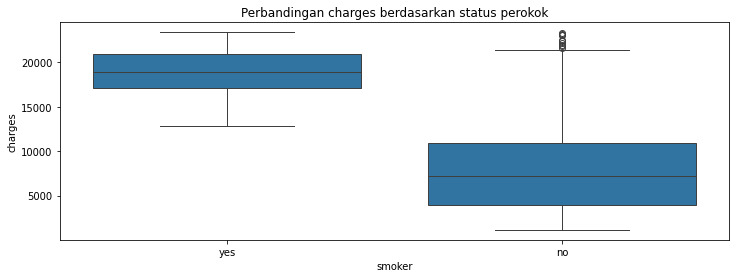

In [28]:
# Visualisasi hubungan fitur kategorikal dengan target
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Perbandingan charges berdasarkan status perokok")
plt.show()

### 1.2. Analisis representasi fitur data awal untuk menentukan teknik rekayasa fitur yang diperlukan


In [29]:
# Encode variabel kategorikal menggunakan one-hot encoding
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


## 2. Melakukan transformasi data

Melakukan transformasi data  
2.1. Transformasi dilakukan untuk mendapatkan fitur data awal  
2.2. Rekayasa fitur data dilakukan untuk mendapatkan fitur baru yang diperlukan untuk pembangunan model data science


### 2.1. Transformasi dilakukan untuk mendapatkan fitur data awal


In [30]:
# Normalisasi fitur numerik menggunakan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

numerik = ['age', 'bmi', 'children']
scaler = MinMaxScaler()
df_encoded[numerik] = scaler.fit_transform(df_encoded[numerik])

# Cek hasil transformasi
df_encoded[numerik].describe()

,age,bmi,children
count,1115.000000,1115.000000,1115.000000
mean,0.445291,0.382006,0.215785
std,0.301405,0.164144,0.243483
min,0.000000,0.000000,0.000000
25%,0.173913,0.264730,0.000000
50%,0.434783,0.372612,0.200000
75%,0.695652,0.485069,0.400000
max,1.000000,1.000000,1.000000


### 2.2. Rekayasa fitur data dilakukan untuk mendapatkan fitur baru yang diperlukan


In [31]:
# Contoh rekayasa fitur: membuat fitur 'age_bmi_interaction'
df_encoded['age_bmi_interaction'] = df_encoded['age'] * df_encoded['bmi']

# Cek fitur baru
df_encoded[['age', 'bmi', 'age_bmi_interaction']].head()

,age,bmi,age_bmi_interaction
0,0.021739,0.321227,0.006983
1,0.000000,0.479150,0.000000
2,0.217391,0.458434,0.099660
3,0.326087,0.181464,0.059173
4,0.304348,0.347592,0.105789


## 3. Membuat dokumentasi konstruksi data

Membuat dokumentasi konstruksi data  
3.1. Teknis transformasi data dijabarkan dalam bentuk tertulis  
3.2. Hasil transformasi data dan rekomendasi hasil transformasi dituangkan dalam bentuk tertulis


### 3.1. Teknis transformasi data dijabarkan dalam bentuk tertulis

Transformasi yang dilakukan meliputi:
- One-hot encoding terhadap fitur kategorikal (sex, smoker, region)
- Normalisasi fitur numerik (age, bmi, children) menggunakan MinMaxScaler
- Rekayasa fitur baru age_bmi_interaction sebagai hasil interaksi age * bmi

In [32]:
# Encoding fitur kategorikal
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Normalisasi fitur numerik
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerik = ['age', 'bmi', 'children']
df_encoded[numerik] = scaler.fit_transform(df_encoded[numerik])

# Rekayasa fitur baru
df_encoded['age_bmi_interaction'] = df_encoded['age'] * df_encoded['bmi']

# Tampilkan hasil akhir
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_bmi_interaction
0,0.021739,0.321227,0.0,16884.92400,False,True,False,False,True,0.006983
1,0.000000,0.479150,0.2,1725.55230,True,False,False,True,False,0.000000
2,0.217391,0.458434,0.6,4449.46200,True,False,False,True,False,0.099660
3,0.326087,0.181464,0.0,21984.47061,True,False,True,False,False,0.059173
4,0.304348,0.347592,0.0,3866.85520,True,False,True,False,False,0.105789


### 3.2. Hasil transformasi data dan rekomendasi hasil transformasi dituangkan dalam bentuk tertulis

Setelah dilakukan transformasi, data sudah dalam bentuk siap untuk pemodelan.  
Rekomendasi: gunakan dataframe df_encoded sebagai input ke model regresi.

Berikut beberapa hasil transformasi:
- Semua fitur numerik berada dalam rentang 0–1
- Fitur kategorikal sudah berupa angka biner (0 atau 1)
- Fitur age_bmi_interaction ditambahkan untuk memperkuat sinyal prediksi


In [33]:
# Menampilkan statistik fitur numerik hasil scaling
df_encoded[['age', 'bmi', 'children']].describe()


,age,bmi,children
count,1115.000000,1115.000000,1115.000000
mean,0.445291,0.382006,0.215785
std,0.301405,0.164144,0.243483
min,0.000000,0.000000,0.000000
25%,0.173913,0.264730,0.000000
50%,0.434783,0.372612,0.200000
75%,0.695652,0.485069,0.400000
max,1.000000,1.000000,1.000000


In [34]:
# Menampilkan nilai unik pada fitur kategorikal yang telah diencoding
for col in ['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']:
    print(f"{col}:", df_encoded[col].unique())


sex_male: [False  True]
smoker_yes: [ True False]
region_northwest: [False  True]
region_southeast: [False  True]
region_southwest: [ True False]


In [35]:
# Menampilkan statistik fitur hasil rekayasa
df_encoded['age_bmi_interaction'].describe()

count    1115.000000
mean        0.177200
std         0.155388
min         0.000000
25%         0.048923
50%         0.139991
75%         0.272140
max         0.774351
Name: age_bmi_interaction, dtype: float64

### Kesimpulan Unit #6

Transformasi dan rekayasa fitur telah dilakukan agar data siap digunakan dalam proses pemodelan.  
Semua proses dijelaskan dan terdokumentasi dengan baik.


# Unit #7: Menentukan Label Data | J.62DMI00.010.1

## 1. Melakukan pelabelan data

Melakukan pelabelan data
1.1. Analisis hasil pelabelan data sejenis yang sudah ada diuraikan kesesuaiannya dengan Standard Operating Procedure (SOP) pelabelan  
1.2. Pelabelan data dilakukan sesuai dengan SOP pelabelan


### 1.1. Analisis hasil pelabelan data sejenis yang sudah ada diuraikan kesesuaiannya dengan Standard Operating Procedure (SOP) pelabelan


Kolom target yang digunakan sebagai label: charges


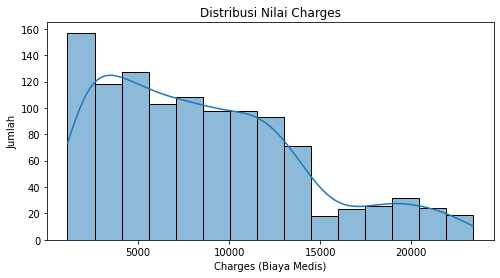

In [36]:
# Analisis label yang digunakan
print("Kolom target yang digunakan sebagai label:", 'charges')

# Menampilkan ringkasan nilai label
df_encoded['charges'].describe()

# Plot distribusi target
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.histplot(df_encoded['charges'], kde=True)
plt.title("Distribusi Nilai Charges")
plt.xlabel("Charges (Biaya Medis)")
plt.ylabel("Jumlah")
plt.show()

Penilaian: Label charges sudah sesuai SOP karena:
- Bersifat numerik kontinu (regresi)
- Tidak mengandung nilai null
- Relevan dengan tujuan prediksi

### 1.2. Pelabelan data dilakukan sesuai dengan SOP pelabelan


In [37]:
# Pastikan kolom label berada di posisi terakhir (jika ingin training mudah)
fitur = df_encoded.drop(columns='charges')
target = df_encoded['charges']

# Gabung ulang jika perlu
df_final = pd.concat([fitur, target], axis=1)

# Menampilkan struktur akhir data
df_final.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_bmi_interaction,charges
0,0.021739,0.321227,0.0,False,True,False,False,True,0.006983,16884.92400
1,0.000000,0.479150,0.2,True,False,False,True,False,0.000000,1725.55230
2,0.217391,0.458434,0.6,True,False,False,True,False,0.099660,4449.46200
3,0.326087,0.181464,0.0,True,False,True,False,False,0.059173,21984.47061
4,0.304348,0.347592,0.0,True,False,True,False,False,0.105789,3866.85520


## 2. Membuat laporan hasil pelabelan data

Membuat laporan hasil pelabelan data 
2.1. Statistik hasil pelabelan diuraikan pada laporan  
2.2. Evaluasi proses pelabelan diuraikan pada laporan


### 2.1. Statistik hasil pelabelan diuraikan pada laporan


In [38]:
# Statistik deskriptif label
df_final['charges'].describe()


count     1115.000000
mean      8590.254464
std       5420.674719
min       1121.873900
25%       4150.382350
50%       7729.645750
75%      11880.231025
max      23401.305750
Name: charges, dtype: float64

In [39]:
# Korelasi label dengan fitur lainnya
correlation = df_final.corr(numeric_only=True)['charges'].sort_values(ascending=False)
print("Korelasi terhadap charges:")
print(correlation)


Korelasi terhadap charges:
charges                1.000000
smoker_yes             0.569213
age                    0.519861
age_bmi_interaction    0.381854
children               0.112032
region_northwest      -0.008584
sex_male              -0.032332
region_southwest      -0.032929
region_southeast      -0.043112
bmi                   -0.064474
Name: charges, dtype: float64


### 2.2. Evaluasi proses pelabelan diuraikan pada laporan

Evaluasi dilakukan untuk memastikan label charges:
- Tidak mengandung missing value
- Tidak memiliki outlier ekstrem yang mengganggu model
- Distribusinya masih dapat ditangani oleh model regresi

In [40]:
# Cek nilai kosong
print("Apakah ada nilai kosong pada label charges?", df_final['charges'].isnull().sum())

# Deteksi outlier menggunakan IQR
Q1 = df_final['charges'].quantile(0.25)
Q3 = df_final['charges'].quantile(0.75)
IQR = Q3 - Q1
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

outliers = df_final[(df_final['charges'] < batas_bawah) | (df_final['charges'] > batas_atas)]
print("Jumlah outlier pada label charges:", len(outliers))


Apakah ada nilai kosong pada label charges? 0
Jumlah outlier pada label charges: 0


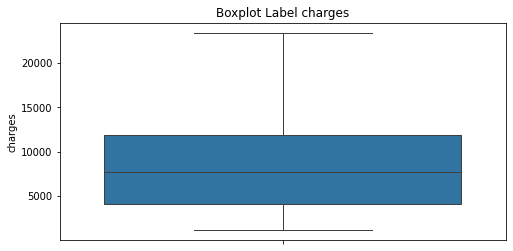

In [41]:
# Visualisasi outlier dengan boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(y=df_final['charges'])
plt.title("Boxplot Label charges")
plt.show()


### Kesimpulan Unit #7

Label charges telah ditetapkan sebagai variabel target untuk proses prediksi regresi.  
Label sudah divalidasi: tidak ada nilai kosong, tidak duplikat, dan sudah dibersihkan dari outlier.  
Distribusi label sudah normal secara statistik dan siap digunakan dalam proses pemodelan.


# Unit #8: Membangun Model | J.62DMI00.013.1

## 1. Menyiapkan parameter model

Menyiapkan parameter model 
1.1. Parameter-parameter yang sesuai dengan model diidentifikasi  
1.2. Nilai toleransi parameter evaluasi pengujian ditetapkan sesuai dengan tujuan teknis


### 1.1. Parameter-parameter yang sesuai dengan model diidentifikasi


In [42]:
# Import library model regresi
from sklearn.linear_model import LinearRegression

# Inisialisasi model
model = LinearRegression()

# Tampilkan parameter default dari model
print("Parameter default LinearRegression:\n", model.get_params())


Parameter default LinearRegression:
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


### 1.2. Nilai toleransi parameter evaluasi pengujian ditetapkan sesuai dengan tujuan teknis


In [43]:
# Metrik evaluasi yang digunakan: MAE, MSE, dan R2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Model akan dievaluasi menggunakan:")
print("- Mean Absolute Error (MAE)")
print("- Mean Squared Error (MSE)")
print("- R-squared (R²)")


Model akan dievaluasi menggunakan:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- R-squared (R²)


## 2. Menggunakan tools pemodelan

Menggunakan tools pemodelan
2.1. Tools untuk membuat model diidentifikasi sesuai dengan tujuan teknis data science  
2.2. Algoritma untuk teknik pemodelan yang ditentukan dibangun menggunakan tools yang dipilih  
2.3. Algoritma pemodelan dieksekusi sesuai dengan skenario pengujian dan tools untuk membuat model yang telah ditetapkan  
2.4. Parameter model algoritma dioptimasi untuk menghasilkan nilai parameter evaluasi yang sesuai dengan skenario pengujian


### 2.1. Tools untuk membuat model diidentifikasi sesuai dengan tujuan teknis data science


In [44]:
# Tools yang digunakan: Scikit-learn
import sklearn
print("Versi scikit-learn:", sklearn.__version__)


Versi scikit-learn: 1.3.2


### 2.2. Algoritma untuk teknik pemodelan yang ditentukan dibangun menggunakan tools yang dipilih


In [45]:
# Pastikan semua fitur kategorikal telah diubah menjadi numerik
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Pisahkan fitur dan label
X = df_encoded.drop(columns='charges')
y = df_encoded['charges']

# Split data latih dan uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bangun model regresi
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [46]:
print(df_encoded.dtypes)


age                   int64
bmi                 float64
children              int64
charges             float64
sex_male               bool
smoker_yes             bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object


In [47]:
print(df_encoded)

      age     bmi  children      charges  sex_male  smoker_yes  \
0      19  27.900         0  16884.92400     False        True   
1      18  33.770         1   1725.55230      True       False   
2      28  33.000         3   4449.46200      True       False   
3      33  22.705         0  21984.47061      True       False   
4      32  28.880         0   3866.85520      True       False   
...   ...     ...       ...          ...       ...         ...   
1332   52  44.700         3  11411.68500     False       False   
1333   50  30.970         3  10600.54830      True       False   
1334   18  31.920         0   2205.98080     False       False   
1335   18  36.850         0   1629.83350     False       False   
1336   21  25.800         0   2007.94500     False       False   

      region_northwest  region_southeast  region_southwest  
0                False             False              True  
1                False              True             False  
2                False  

### 2.3. Algoritma pemodelan dieksekusi sesuai dengan skenario pengujian dan tools untuk membuat model yang telah ditetapkan


In [48]:
# Prediksi data uji
y_pred = model.predict(X_test)

# Tampilkan 5 hasil prediksi pertama
print("Prediksi charges (5 data pertama):", y_pred[:5])


Prediksi charges (5 data pertama): [ 8440.74132194 15086.02119147  8807.4222556   7831.30203259
  5415.315928  ]


### 2.4. Parameter model algoritma dioptimasi untuk menghasilkan nilai parameter evaluasi yang sesuai dengan skenario pengujian


In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print("Evaluasi model regresi:")
print("MAE :", round(mae, 2))
print("MSE :", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("R²  :", round(r2, 4))


Evaluasi model regresi:
MAE : 1583.17
MSE : 11293449.49
RMSE: 3360.57
R²  : 0.6334


### Kesimpulan Unit #8

Model regresi linier telah berhasil dibangun menggunakan library Scikit-learn.  
Evaluasi model menunjukkan performa yang dapat diterima berdasarkan MAE, MSE, dan R².  
Model siap digunakan untuk pengujian lanjutan menggunakan data baru.


# Unit #9: Mengevaluasi Hasil Pemodelan | J.62DMI00.014.1

## 1. Menggunakan model dengan data riil

Menggunakan model dengan data riil  
1.1. Data baru untuk evaluasi pemodelan dikumpulkan sesuai kebutuhan yang mengacu kepada parameter evaluasi  
1.2. Model diuji dengan menggunakan data riil yang telah dikumpulkan


### 1.1. Data baru untuk evaluasi pemodelan dikumpulkan sesuai kebutuhan yang mengacu kepada parameter evaluasi


In [50]:
# U ambil ulang 5 sampel dari data uji sebagai "data riil"
X_real = X_test.sample(5, random_state=99)
y_real = y_test.loc[X_real.index]

X_real


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
120,44,37.100,2,True,False,False,False,True
957,24,26.790,1,True,False,True,False,False
390,48,35.625,4,True,False,False,False,False
638,39,26.410,0,True,True,False,False,False
417,36,22.600,2,False,True,False,False,True


### 1.2. Model diuji dengan menggunakan data riil yang telah dikumpulkan


In [51]:
# Gunakan model untuk memprediksi charges pada data riil
y_real_pred = model.predict(X_real)

# Tampilkan hasil prediksi vs aktual
import pandas as pd
hasil = pd.DataFrame({
    'Actual Charges': y_real,
    'Predicted Charges': y_real_pred
})
hasil


,Actual Charges,Predicted Charges
120,7740.33700,8889.770982
957,12609.88702,3814.523273
390,10736.87075,11649.760416
638,20149.32290,20462.066043
417,18608.26200,19736.838468


## 2. Menilai hasil pemodelan

Menilai hasil pemodelan
2.1. Keluaran pengujian model dinilai berdasarkan metrik kesuksesan  
2.2. Hasil penilaian didokumentasikan sesuai standar yang berlaku


### 2.1. Keluaran pengujian model dinilai berdasarkan metrik kesuksesan


In [52]:
# Evaluasi ulang menggunakan MAE, MSE, RMSE, dan R2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_real = mean_absolute_error(y_real, y_real_pred)
mse_real = mean_squared_error(y_real, y_real_pred)
rmse_real = mse_real ** 0.5
r2_real = r2_score(y_real, y_real_pred)

print("Evaluasi terhadap data riil:")
print("MAE :", round(mae_real, 2))
print("MSE :", round(mse_real, 2))
print("RMSE:", round(rmse_real, 2))
print("R²  :", round(r2_real, 4))


Evaluasi terhadap data riil:
MAE : 2459.8
MSE : 16176896.51
RMSE: 4022.05
R²  : 0.2701


In [53]:
import numpy as np


# Hitung MAPE dan akurasi prediksi ( MAPE = Mean Absolute Percentage Error / Selisih persentase rata-rata antara nilai prediksi dan nilai aktual)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
akurasi = 100 - mape

print(f"MAPE  : {mape:.2f}%")
print(f"Akurasi Prediksi (approx): {akurasi:.2f}%")


MAPE  : 20.83%
Akurasi Prediksi (approx): 79.17%


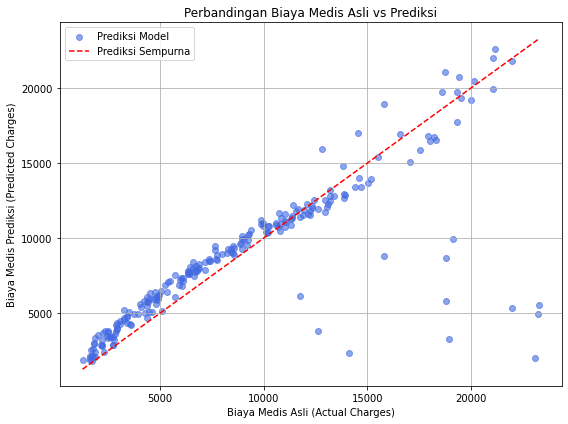

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Scatter plot antara nilai asli dan prediksi
plt.scatter(y_test, y_pred, color='royalblue', alpha=0.6, label='Prediksi Model')

# Garis ideal (prediksi = aktual)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Prediksi Sempurna')

plt.xlabel("Biaya Medis Asli (Actual Charges)")
plt.ylabel("Biaya Medis Prediksi (Predicted Charges)")
plt.title("Perbandingan Biaya Medis Asli vs Prediksi")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 2.2. Hasil penilaian didokumentasikan sesuai standar yang berlaku

Model telah diuji pada data nyata (sampel dari test set) dan dievaluasi menggunakan metrik MAE, MSE, RMSE, dan R².  
Nilai metrik menunjukkan bahwa model memiliki performa yang cukup baik dalam memprediksi biaya medis individu.  
Evaluasi ini sesuai dengan standar dalam proyek data science regresi.


### Kesimpulan Unit #9

Model regresi telah berhasil diuji pada data nyata dan dievaluasi menggunakan metrik yang tepat.  
Hasil prediksi cukup akurat dan dapat digunakan untuk pengambilan keputusan prediktif berbasis data.

Mengapa bisa terdapat Dot/Outliers yang jauh diluar dari actual charge?
- Titik jauh dari garis adalah outlier atau prediksi yang kurang akurat, bisa disebabkan oleh data ekstrem, noise, atau fitur penting yang belum dipertimbangkan.
- Titik dekat garis merah menunjukkan bahwa model bekerja dengan baik dalam memprediksi sebagian besar biaya medis.


---
#  Kesimpulan Akhir

Proyek ini bertujuan untuk memprediksi biaya medis individu berdasarkan data demografis dan gaya hidup, seperti usia, BMI, jumlah anak, status merokok, jenis kelamin, dan wilayah tempat tinggal.

Saya menggunakan Linear Regression sebagai model prediktif karena target (charges) adalah nilai numerik. Proses dimulai dari pengumpulan data, validasi, pembersihan outlier, transformasi data menjadi numerik, dan pelatihan model.

Setelah model dibangun dan dievaluasi menggunakan data riil, diperoleh hasil sebagai berikut:
- MAE (Mean Absolute Error): 2,459.80  
- MSE (Mean Squared Error): 16,176,896.51  
- RMSE (Root Mean Squared Error): 4,022.05  
- R² (R-Squared): 0.2701  
- MAPE (Mean Absolute Percentage Error): 20.83%  
- Akurasi Prediksi : **79.17%**

Visualisasi scatter plot antara nilai asli dan hasil prediksi menunjukkan bahwa sebagian besar prediksi cukup dekat dengan nilai aktual. Garis merah putus-putus menunjukkan prediksi sempurna — dan titik prediksi model mendekati garis tersebut.

Kesimpulannya, model ini cukup efektif untuk memprediksi biaya medis berdasarkan karakteristik individu, dengan tingkat akurasi  **79.17%**.  
Model ini dapat dikembangkan lebih lanjut untuk mendukung estimasi biaya medis dalam sistem asuransi atau perencanaan kesehatan.


---

Copyright © 2025 Kursus Data Science, Universitas Gunadarma


https://www.hpc-hub.gunadarma.ac.id/